# **Travel probability from one proince to another province**

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data set

In [2]:
mobility_data = pd.read_csv("travel_probability.csv")
population_data = pd.read_csv("Population_2020.csv")


### Algorithm

In [3]:
origin = mobility_data["mi"]*1000  #### population of origin
destination = mobility_data["mj"]*1000  #### population of destination
surrounding_population = mobility_data["sij"]*1000  #### surrounding population


proportion_of_travelers = np.zeros((9,9)) #### This matrix expresses the travel probability from province i to province j
                                               #### In the context of the radiation model, the row sum of this matrix is not equal to 1

M = np.sum(population_data["Population"])*1000 ### Total population

row = 0
for z in range(0,81,9):
    for j in range(0,9):
            proportion_of_travelers[row][j] =(origin[j+z]*destination[j+z])/((1-origin[j+z]/M)*(origin[j+z]+surrounding_population[j+z])*(origin[j+z]+destination[j+z]+surrounding_population[j+z]))
    row = row + 1    

### Travel probability

In [4]:
print(proportion_of_travelers)

[[0.57265649 0.01879178 0.01803897 0.14869501 0.00806089 0.48872354
  0.02261879 0.14599063 0.14908038]
 [0.16167745 0.53793906 0.18632981 0.06861241 0.00490763 0.0339753
  0.01376521 0.47565068 0.05525139]
 [0.15595273 0.0457407  0.53044379 0.69001585 0.02111434 0.02150492
  0.00948477 0.01957238 0.03667678]
 [0.58700316 0.01728499 0.02732292 0.56386641 0.0074194  0.03140127
  0.02081297 0.01660007 0.29233243]
 [0.05200831 0.06151185 0.57224144 0.24233889 0.52349903 0.00907086
  0.00782334 0.0049876  0.05007182]
 [0.63100897 0.01019565 0.00952915 0.0222319  0.00583847 0.54993892
  0.03290087 0.02338083 0.2650151 ]
 [0.04604146 0.01568781 0.01057804 0.02959791 0.00777563 0.49477193
  0.56679834 0.03171371 0.36404488]
 [0.70945447 0.05243418 0.0051706  0.01180381 0.00380049 0.1187932
  0.04699986 0.53030845 0.05160908]
 [0.16311167 0.03812244 0.03562336 0.24735889 0.02183404 0.34884862
  0.10417599 0.04171676 0.69513238]]


### Normalized travel probability

In [5]:
normalized_proportion_of_travelers = np.zeros((9,9))

for i in range(0,9):
    a = np.sum(proportion_of_travelers[i])
    for j in range(0,9):
        normalized_proportion_of_travelers[i][j] = proportion_of_travelers[i][j]/a

print(normalized_proportion_of_travelers)

[[0.36413323 0.01194907 0.01147038 0.09455021 0.00512565 0.31076306
  0.01438254 0.09283059 0.09479526]
 [0.10511443 0.34974055 0.12114214 0.04460829 0.00319069 0.022089
  0.00894944 0.30924382 0.03592163]
 [0.10189617 0.029886   0.34658061 0.45084156 0.01379566 0.01405085
  0.00619715 0.01278818 0.02396382]
 [0.37531125 0.01105148 0.01746941 0.36051834 0.00474373 0.02007698
  0.01330716 0.01061356 0.1869081 ]
 [0.0341362  0.04037394 0.37559664 0.15906166 0.34360405 0.00595375
  0.00513493 0.00327367 0.03286516]
 [0.4070921  0.00657767 0.00614768 0.01434279 0.00376666 0.35479018
  0.02122582 0.01508402 0.17097309]
 [0.02938173 0.0100113  0.00675046 0.01888814 0.00496208 0.31574274
  0.36170697 0.02023836 0.2323182 ]
 [0.46358236 0.03426233 0.00337865 0.00771303 0.00248337 0.07762363
  0.03071135 0.34652209 0.03372318]
 [0.09617864 0.02247886 0.02100528 0.14585493 0.01287442 0.20569824
  0.06142727 0.02459825 0.40988412]]


### Heatmap of normalized travel probability

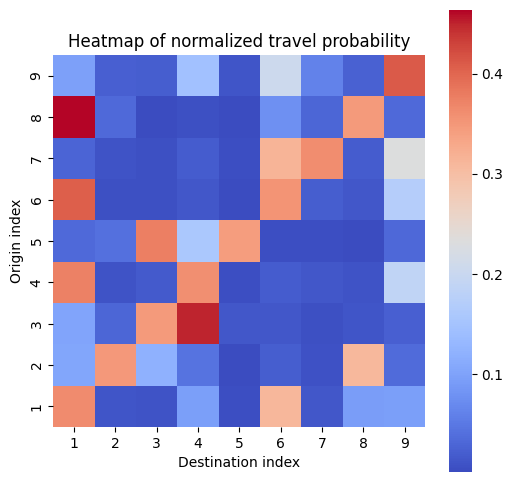

In [6]:
#data = np.array([generalized_proportion_of_travelers[0],generalized_proportion_of_travelers[1],generalized_proportion_of_travelers[2],generalized_proportion_of_travelers[3],generalized_proportion_of_travelers[4],generalized_proportion_of_travelers[5],generalized_proportion_of_travelers[6],generalized_proportion_of_travelers[7],generalized_proportion_of_travelers[8]])
normalized_proportion_of_travelers_heat_map = np.zeros((9,9))

for i in range(0,9):
    normalized_proportion_of_travelers_heat_map[8-i] = normalized_proportion_of_travelers[i]

index_origin = [9,8,7,6,5,4,3,2,1]
index_destination = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize = (6,6))
sns.heatmap(normalized_proportion_of_travelers_heat_map,cmap='coolwarm',square=True,xticklabels=index_destination,yticklabels=index_origin)
plt.xlabel("Destination index")
plt.ylabel("Origin index")
plt.title("Heatmap of normalized travel probability")
plt.show()
